from typ

In [1]:
from gen_ai_hub.proxy.langchain.init_models import init_llm


model = init_llm("gpt-4o")

model.invoke("Are you there?").content

"Yes, I'm here! How can I assist you today?"

In [2]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import START, END, StateGraph, MessagesState
from langgraph.graph.message import add_messages

In [55]:


graph_builder = StateGraph(state_schema=MessagesState)

In [56]:
def chatbot(state:MessagesState):
    return {"messages" : model.invoke(state["messages"])}

In [57]:
graph_builder.add_node("chatbot", chatbot)

In [58]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [59]:
from langgraph.checkpoint.memory import MemorySaver
# Add memory
memory = MemorySaver()
graph = graph_builder.compile(checkpointer=memory)

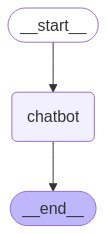

In [60]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))


In [61]:
# while True:
#     user_input = input("user: \n")
#     if user_input.lower() == "exit":break
#     for event in graph.stream({"messages": user_input}):
#         print(event.values())
#         for value in event.values():
#             print(value["messages"].content)

In [ ]:
from langchain_core.messages import HumanMessage
config = {"configurable": {"thread_id": "abc125"}}
query = "Hi my name is rakesh"
input_messages = [HumanMessage(query)]
print(graph.invoke({"messages" : input_messages}, config))

AttributeError: 'AddableValuesDict' object has no attribute 'content'

In [69]:
query = "What is my name?"
input_messages = [HumanMessage(query)]
print(graph.invoke({"messages" : input_messages}, config))

{'messages': [HumanMessage(content='Hi my name is rakesh', additional_kwargs={}, response_metadata={}, id='f4e5c2e6-eca5-4475-b2ad-1a333223d476'), AIMessage(content='Hello Rakesh! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 14, 'total_tokens': 27, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_ee1d74bde0', 'id': 'chatcmpl-BOnBnuIYHLDgmf2FJCm2gfc0cK1td', 'finish_reason': 'stop', 'logprobs': None}, id='run-c581669b-d490-4601-92bc-b8f9f2f34530-0', usage_metadata={'input_tokens': 14, 'output_tokens': 13, 'total_tokens': 27, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), HumanMessage(content='Hi my name is rakesh',

In [73]:
from langchain_core.messages import HumanMessage
# config = {"configarable": {"thread_id" : "abc123"}}
config = {"configurable": {"thread_id": "abc124"}}

while True:
    query = input("User: \n")
    print("Human: ", query)
    if query.lower() == "exit":
        print("Good Bye!!!")
        break
    input_messages = [HumanMessage(content=query)]
    print("AI: ",graph.invoke({"messages":input_messages}, config=config)["messages"][-1].content)
    print("--" * 200)


Human:  my company name?
AI:  You mentioned that you are a data science scholar at SAP. How can I assist you further?
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Human:  exit
Good Bye!!!
